In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
import math

In [3]:
df = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/Hypothesis Testing ( City Payroll Data )/data.csv")
df.head()

C:\Users\varun\anaconda3\envs\condaenv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


## Data Cleaning

In [4]:
df = df[pd.notnull(df['Payroll Department'])]

In [5]:
df.rename(columns={'Projected Annual Salary' : 'Annual_Salary'}, inplace = True)
df.rename(columns={'Job Class Title' : 'Job_Title'}, inplace = True)
df.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [6]:
for i in ['Annual_Salary','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
   df[i] = df[i].str.replace('$','')

In [7]:
df = df[df.Annual_Salary != 0]
df = df[df.Base_Pay != 0]
df.Annual_Salary = df.Annual_Salary.astype(float)
df.Base_Pay = df.Base_Pay.astype(float)

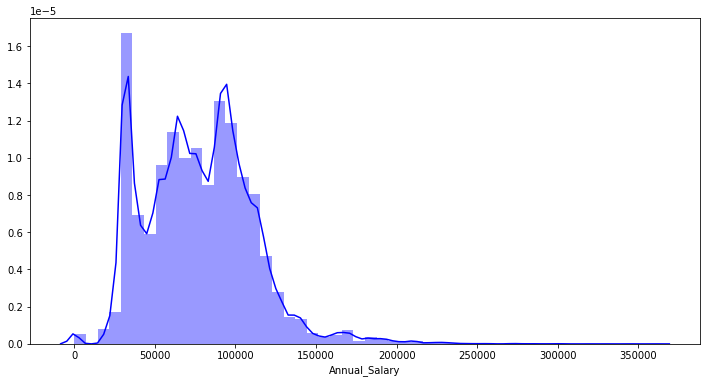

In [8]:
plt.figure(figsize = (12,6))
sns.distplot(df.Annual_Salary, color='blue')

### Collecting Samples randomly

In [9]:
payee_2015 = df[df.Year == 2015]
payee_2016 = df[df.Year == 2016]

In [10]:
import statistics

### Calliculating Population Parameters

In [11]:
population_mean_2015 = payee_2015['Annual_Salary'].mean()
population_standarddeviation_2015 = statistics.stdev(payee_2015.Annual_Salary)

print("Population Mean: "+str(population_mean_2015))
print("Population Standard Deviation: "+str(population_standarddeviation_2015))

Population Mean: 76046.39152504776
Population Standard Deviation: 34232.25489729045


### Calliculating Sample Parameters

In [12]:
population_mean_2016 = payee_2016['Annual_Salary'].mean()
payee_2016_sample = payee_2016.sample(frac = 0.10)
sample_mean_2016 = payee_2016_sample['Annual_Salary'].mean()
sample_standarddeviation_2016 = statistics.stdev(payee_2016.Annual_Salary)

print("Population Mean: "+str(population_mean_2016))
print("Sample Mean: "+str(sample_mean_2016))
print("Sample Standard Deviation: "+str(sample_standarddeviation_2016))

Population Mean: 78711.19987224769
Sample Mean: 78749.59889236616
Sample Standard Deviation: 33572.9812108376


# Hypothesis Testing

## Normal Distribution

* Null Hypothesi = salary doesn't increase in 2016
* Alternative Hypothesis = salary will increase in 2016
* Population Parameters:
    * Mean = population_mean_2015
    * Standard Deviation = population_standarddeviation_2015
* Sample Parameters:
    * Mean = population_mean_2016
    * Standard Deviation = population_standarddeviation_2016

* Considering the confidence level as 95% 
* Significance Level = 1-confidence level = 1 - 0.95 = 0.5
* Using z-table (one tail test) => z_critical = 1.65

In [13]:
z_critical = 1.65

#### Calliculating test statistics

In [14]:
z_test_stats = ((sample_mean_2016 - population_mean_2015) * math.sqrt(8916)/sample_standarddeviation_2016) # 8916 being the random variable of salary #
print(z_test_stats)

7.602816085458932


* As the test statistics fall into the rejection region the null hypothesis is rejected

#### Type1 Type2 Hypothesis Error

* In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative").

In [15]:
population_mean_2016 = payee_2016["Annual_Salary"].mean()
population_standarddeviation_2016 = statistics.stdev(df.Annual_Salary)
zscore_error = ((population_mean_2016 - population_mean_2015)/population_standarddeviation_2016)
print("zscore error = ",zscore_error)

zscore error =  0.0795349800549895


* It clearly states that a Type 1 error as the population meanis well within acceptable region.

# Student T - Distribution

* Null Hypothesi = salary doesn't increase in 2016
* Alternative Hypothesis = salary will increase in 2016
* Population Parameters:
    * Mean = population_mean_2015
    * Standard Deviation = population_standarddeviation_2015
* Sample Parameters:
    * Mean = population_mean_2016
    * Standard Deviation = population_standarddeviation_2016

In [16]:
payee_2014 = df[df.Year == 2014]
payee_2015 = df[df.Year == 2015]
payee_t_sample_2015 = payee_2015.sample(frac = 0.00062)

In [17]:
N = len(payee_t_sample_2015)
sample_mean_2015 = payee_t_sample_2015['Annual_Salary'].mean()
sample_standarddeviation_2015 = statistics.stdev(payee_t_sample_2015.Annual_Salary)
population_standarddeviation_2014 = statistics.stdev(payee_2014.Annual_Salary)
population_mean_2014 = payee_2014['Annual_Salary'].mean()

* Considering the confidence level as 95% 
* Significance Level = 1-confidence level = 1 - 0.95 = 0.5
* Using t-table (one tail test) => t_critical = 1.311

In [18]:
t_critical = 1.311

### Calliculating test statistics

In [19]:
tscore_test_stat = ((sample_mean_2015 - population_mean_2014) * math.sqrt(N))/sample_standarddeviation_2015
print(tscore_test_stat)

-1.3024094070542482


* As the tscore_test_stat is less than the t_critical we reject null hypothesis

### Predictive Analysis using Machine Learning

#### Transforming qualitative data in to vectors

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vector = TfidfVectorizer(stop_words='english')
dtm = vector.fit_transform(df.Job_Title)

#### Splitting data in to training & testing datasets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = dtm
y = df.Annual_Salary

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

# Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
prediction_train = regressor.predict(x_train)
prediction_test = regressor.predict(x_test)

print('Root mean square of training set : {}'.format(r2_score(y_train, prediction_train)))
print('Root mean square of testing set : {}'.format(r2_score(y_test, prediction_test)))

Root mean square of training set : 0.9599540397248499
Root mean square of testing set : 0.9584061289078285


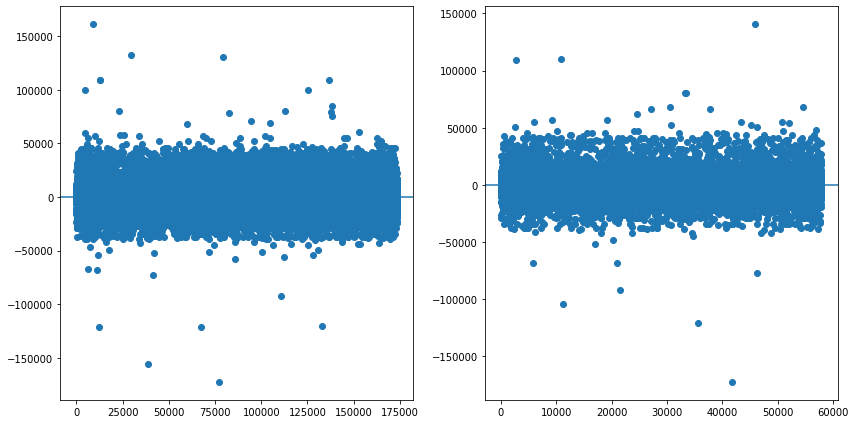

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(prediction_train)), y_train - prediction_train,'o')
plt.axhline(0)
plt.subplot(1,2,2)
plt.plot(np.arange(len(prediction_test)), y_test - prediction_test,'o')
plt.axhline(0)
plt.tight_layout()

# Linear Regression

In [30]:
y = df["Average Benefit Cost"]
x = df[['Annual_Salary','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments']].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression()

In [33]:
regressor.fit(x_train, y_train)
print(regressor.intercept_)

3128.4898183139894


In [34]:
coeff_df = pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
print(ranked_suburbs)

               Coefficient
Q1 Payments       0.167094
Q4 Payments       0.051139
Annual_Salary     0.033158
Q2 Payments       0.032263
Q3 Payments      -0.033797


* Due to the poor coefficient with the targer hence a poor model is expected

In [35]:
prediction_train = regressor.predict(x_train)
prediction_test = regressor.predict(x_test)
print('Root mean Score Training: {}'.format(r2_score(y_train, prediction_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, prediction_test)))

Root mean Score Training: 0.5215988978360815
Root mean Score Testing: 0.5133353870989106


#### Creating best fit line

In [36]:
new = pd.Series(list(y_test)).values
new_list =[]
for i in range(len(new)):
    new_list.insert(i,new[i])
new_list = [float(q) for q in new_list]
new_list = [round(q) for q in new_list]
prediction_test = [float(q) for q in prediction_test]
prediction_test = [round(q) for q in prediction_test]

In [37]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer/denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return(a,b)

In [38]:
a, b = best_fit(new_list, prediction_test)

best fit line:
y = 4635.97 + 0.52x


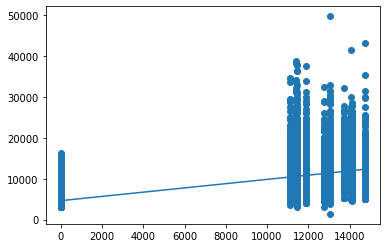

In [39]:
plt.scatter(new_list, prediction_test)
yfit = [a + b * xi for xi in new_list]
plt.plot(new_list, yfit)